In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
import pandas as pd


# Load train and test data from CSV files
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

#(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [2]:
# Extract features and labels
x_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
x_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
x_train[:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [7]:
# Function to plot images
def plot_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title('Label: {}'.format(labels[i]))
        plt.axis('off')
    plt.show()

In [8]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

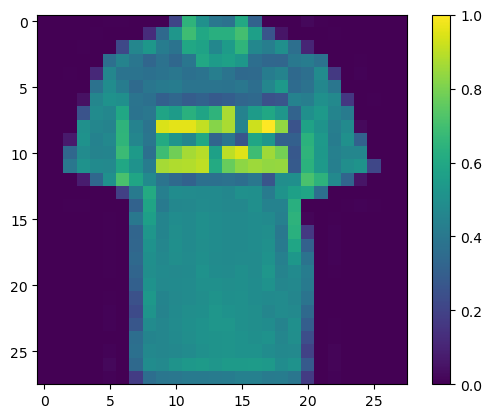

In [9]:
plt.figure()
plt.imshow(x_train[44])
plt.colorbar()
plt.grid(False)
plt.show()

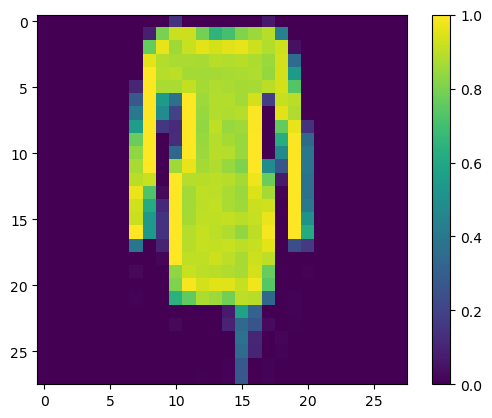

In [10]:
plt.figure()
plt.imshow(x_test[4])
plt.colorbar()
plt.grid(False)
plt.show()

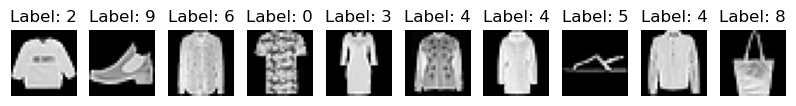

In [11]:
plot_images(x_train, y_train)

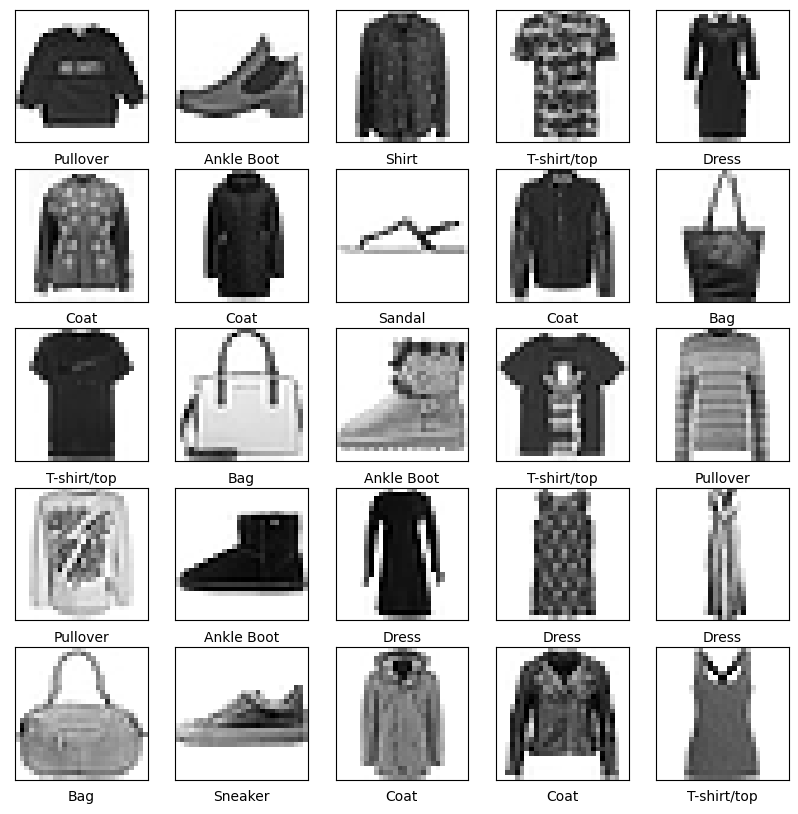

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
x_test.shape

(10000, 28, 28, 1)

In [15]:
y_train.shape

(60000,)

In [16]:
y_test.shape

(10000,)

In [17]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.5761 - accuracy: 0.7862 - val_loss: 0.3564 - val_accuracy: 0.8668
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3809 - accuracy: 0.8638 - val_loss: 0.3119 - val_accuracy: 0.8847
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3334 - accuracy: 0.8786 - val_loss: 0.2782 - val_accuracy: 0.8933
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3021 - accuracy: 0.8896 - val_loss: 0.2562 - val_accuracy: 0.9025
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2829 - accuracy: 0.8963 - val_loss: 0.2451 - val_accuracy: 0.9092
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2717 - accuracy: 0.8988 - val_loss: 0.2408 - val_accuracy: 0.9109
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2580 - accuracy: 0.9051 - val_loss: 0.2336 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

In [ ]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Detailed Explanation and Commentary on the Python Code:

Let's provide a comprehensive explanation for each part of the provided Python code.

### 1. Importing Necessary Libraries
```python
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
```
- **Explanation:**
  - `tensorflow` (`tf`): Library for building and training deep learning models.
  - `matplotlib.pyplot` (`plt`): Library for plotting graphs and images.
  - `numpy` (`np`): Library for numerical operations and array manipulations.
  - `pandas` (`pd`): Library for data manipulation and analysis.

### 2. Loading Data
```python
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')
```
- **Explanation:**
  - This code reads training and testing datasets from CSV files named `'fashion-mnist_train.csv'` and `'fashion-mnist_test.csv'` respectively using pandas.

### 3. Preprocessing Data
```python
x_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
x_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values
```
- **Explanation:**
  - Extracting features (`x_train` and `x_test`) and labels (`y_train` and `y_test`) from the datasets.

### 4. Data Exploration and Visualization
```python
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
```
- **Explanation:**
  - Outputting the shapes of the datasets to understand their dimensions.

### 5. Data Normalization
```python
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
```
- **Explanation:**
  - Scaling the pixel values of the images (`x_train` and `x_test`) to the range [0, 1] by dividing by 255.
  - Reshaping the data to match the input shape expected by the convolutional neural network (CNN).

### 6. Data Visualization
```python
plt.figure()
plt.imshow(x_train[44])
plt.colorbar()
plt.grid(False)
plt.show()
```
- **Explanation:**
  - Visualizing a single image (`x_train[44]`) from the dataset.

### 7. Defining Class Names
```python
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
```
- **Explanation:**
  - Creating a list of class names corresponding to the labels in the dataset.

### 8. Plotting Images
```python
def plot_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title('Label: {}'.format(labels[i]))
        plt.axis('off')
    plt.show()

plot_images(x_train, y_train)
```
- **Explanation:**
  - Defining a function `plot_images` to display a grid of image samples from the dataset with their corresponding labels.

### 9. Building the Convolutional Neural Network (CNN)
```python
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])
```
- **Explanation:**
  - Constructing a CNN model using Keras layers to classify fashion images into different categories.
  - This model consists of convolutional (`Conv2D`), pooling (`MaxPooling2D`), dropout (`Dropout`), and dense (`Dense`) layers.

### 10. Compiling and Training the Model
```python
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
```
- **Explanation:**
  - Compiling the model with specified optimizer, loss function, and evaluation metric.
  - Training the model (`model.fit`) on the training data (`x_train`, `y_train`) for a specified number of epochs.
  - Using the validation data (`x_test`, `y_test`) to monitor the performance of the model during training.

### 11. Evaluating the Model
```python
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
```
- **Explanation:**
  - Evaluating the trained model on the test data to assess its performance.

### 12. Plotting Training and Validation Metrics
```python
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
```
- **Explanation:**
  - Plotting the training and validation accuracy and loss over epochs to visualize the model's performance and check for overfitting.

This detailed commentary covers each part of the provided Python code, explaining its purpose and functionality within the context of building and training a convolutional neural network for image classification using TensorFlow and Keras.

Assignment No: 3 
==================================================================== 
Title: Convolutional neural network (CNN): Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories. 
=====================================================================Objective: 
To learn about Convolutional Neural Network. 
To understand the concept of classification. 
===================================================================== 
Theory: 
. What is Classification? 
 The act or method of distributing into a class or category according to characteristics. 
 The model tries to predict the correct label of a given input data. In classification, the model is fully trained using the training data, and then it is evaluated on test data before being used to perform prediction on new unseen data. 
Figure 1: Classification 
. What is Convolution Neural Network? 
 A Convolutional Neural Network (CNN) is a type of Deep Learning neural network architecture commonly used in Computer Vision. Computer vision is a field of Artificial Intelligence that enables a computer to understand and interpret the image or visual data. 
 Convolutional Neural Network consists of Convolutional layer, Pooling layer, and fully connected layers. 
Figure 1: CNN Architecture 
 The Convolutional layer applies filters to the input image to extract features, the Pooling layer down samples the image to reduce computation, and the fully connected layer makes the final prediction. The network learns the optimal filters through backpropagation and gradient descent. 
. How DL works on classification using CNN? 
 Deep neural networks using CNNs work on classification tasks by learning to automatically extract features from input images and using those features to make predictions.  
 Here's how it works: 
1. Input layer: The input layer of the network takes in the image data as input. 
Convolutional layers: The convolutional layers apply filters to the input images to extract relevant features. Each filter produces a feature map that highlights areas of the image that match the filter. 
2. Activation functions: An activation function is applied to the output of each convolutional layer to introduce nonlinearity into the network. 
3. Pooling layers: The pooling layers down sample the feature maps to reduce the spatial dimensions of the data. 
4. Dropout layer: Dropout is used to prevent overfitting by randomly dropping out a percentage of the neurons in the network during training. 
5. Fully connected layers: The fully connected layers take the flattened output from the last pooling layer and perform a classification task by outputting a probability distribution over the possible classes. 
6. Softmax activation function: The softmax activation function is applied to the output of the last fully connected layer to produce a probability distribution over the possible classes. 
7. Loss function: A loss function is used to compute the difference between the predicted probabilities and the actual labels. 
8. Optimization: An optimization algorithm, such as stochastic gradient descent, is used to minimize the loss function by adjusting the values of the network parameters. 
9. Training: The network is trained on a large dataset of labeled images, adjusting the values of the parameters to minimize the loss function. 
10. Prediction: Once trained, the network can be used to classify new images by passing them through the network and computing the output probability distribution.  
. MNIST Dataset 
 The MNIST Fashion dataset is a collection of 70,000 grayscale images of 28x28 pixels, representing 10 different categories of clothing and accessories. The categories include Tshirts/tops, trousers, pullovers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots. 
 The dataset is often used as a benchmark for testing image classification algorithms, and it is considered a more challenging version of the original MNIST dataset which contains handwritten digits. The MNIST Fashion dataset was released by Zalando Research in 2017 and has since become a popular dataset in the machine learning community. 
 MNIST Fashion dataset is a collection of 70,000 grayscale images of 28x28 pixels each. These images represent 10 different categories of clothing and accessories, with each category containing 7,000 images.  
 The categories are as follows: 
Tshirt/tops 
Trousers 
Pullovers 
Dresses 
Coats 
Sandals 
Shirts 
Sneakers 
Bags 
Ankle boots 
 The images were obtained from Zalando's online store and are preprocessed to be normalized and centered. The training set contains 60,000 images, while the test set contains 10,000 images. The goal of the dataset is to accurately classify the images into their respective categories. 
 The MNIST Fashion dataset is often used as a benchmark for testing image classification algorithms, and it is considered a more challenging version of the original MNIST dataset which contains handwritten digits. The dataset is widely used in the machine learning community for research and educational purposes. 
 Here are the general steps to perform Convolutional Neural Network (CNN) on the MNIST Fashion dataset: 
. Import the necessary libraries, including TensorFlow, Keras, NumPy, and Matplotlib. 
. Load the dataset using Keras' builtin function, keras.datasets.fashion_mnist.load_data(). This will provide the training and testing sets, which will be used to train and evaluate the CNN. 
. Preprocess the data by normalizing the pixel values between 0 and 1, and reshaping the images to be of size (28, 28, 1) for compatibility with the CNN. 
. Define the CNN architecture, including the number and size of filters, activation functions, and pooling layers. This can vary based on the specific problem being addressed. 
. Compile the model by specifying the loss function, optimizer, and evaluation metrics. Common choices include categorical crossentropy, Adam optimizer, and accuracy metric. 
. Train the CNN on the training set using the fit() function, specifying the number of epochs and batch size. 
. Evaluate the performance of the model on the testing set using the evaluate() function. This will provide metrics such as accuracy and loss on the test set.  Use the trained model to make predictions on new images, if desired, using the predict() function. 
Conclusion: In this way we can Classify fashion clothing into categories using CNN. 